In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def half_length_voltage(lamda):
    gamma = 6.8e-3;L=35;d=3;n0=2.286
    V_half=lamda*d/(2*n0**3*gamma*L)             
    return V_half
def getlamda(V_half):
    gamma = 6.8e-3;L=35;d=3;n0=2.286
    lamda=V_half/d*(2*n0**3*gamma*L)
    return lamda
def P(V,V_half,a=1,b=0,c=0):
    return a*np.sin(np.pi*V/(2*V_half)+b)**2+c
def Pt(t,V,V_half,omega=1,a=1,b=0,c=0):
    return a*np.cos(np.pi*V/(2*V_half)+2*np.sin(omega*t)+b)+c

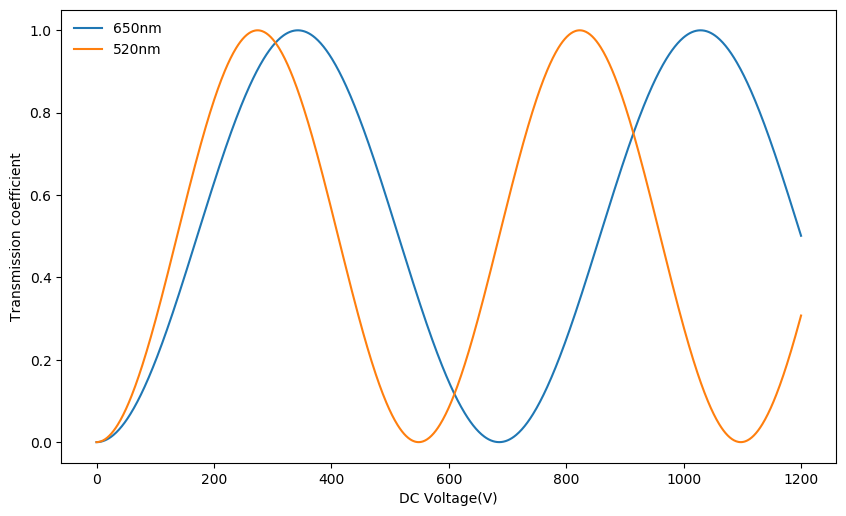

In [175]:
#style=plt.style.available
#print(style)
#plt.style.use(style[0])
V=np.linspace(0,1200,1000)
P1=P(V,half_length_voltage(650))
P2=P(V,half_length_voltage(520))
plt.subplots(figsize=(10,6),dpi=100)
plt.plot(V,P1,label='650nm')
plt.plot(V,P2,label='520nm')
plt.legend(frameon=False,loc='upper left')
plt.xlabel('DC Voltage(V)')
plt.ylabel("Transmission coefficient")
plt.savefig('dctheo.png')

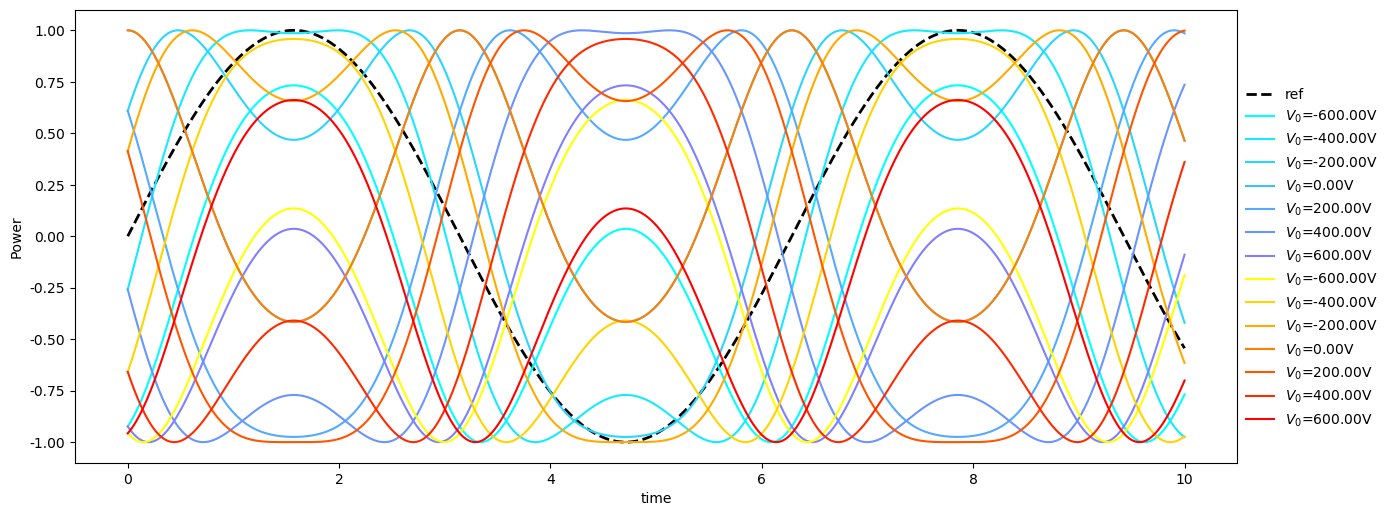

In [168]:
t=np.linspace(0,10,1000)
scale=600
V=np.linspace(-scale,scale,7)
fig,ax=plt.subplots(figsize=(15,6),dpi=100)
fig.subplots_adjust(right=0.9)
ax.plot(t,np.sin(t),c='black',lw=2,ls='--',label='ref')
for v in V:
    P1=Pt(t,v,half_length_voltage(650))
    color=v/scale/2+3/2
    ax.plot(t,P1,label=r'$V_{0}$'+'={:.2f}V'.format(v),c=[(color-1)/2,1-(color-1)/2,1])
    #plt.xticks(np.linspace(0,t[-1],10),labels=['{:.1f}'.format(i) for i in np.linspace(0,1,10)])
plt.xlabel('time')
plt.ylabel("Power")
for v in V:
    P1=Pt(t,v,half_length_voltage(520))
    color=v/scale/2+3/2
    ax.plot(t,P1,label=r'$V_{0}$'+'={:.2f}V'.format(v),c=[1,2-color,0])
    #plt.xticks(np.linspace(0,t[-1],10),labels=['{:.1f}'.format(i) for i in np.linspace(0,1,10)])
fig.legend(frameon=False,loc='right')
fig.savefig('actheo.png') 

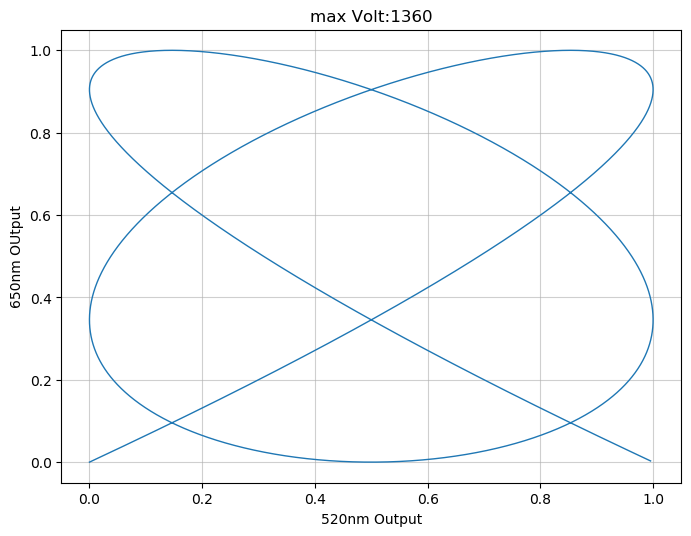

In [203]:
rang=1360
V=np.linspace(0,rang,9000)
x,y=[520,650]
P1=P(V,half_length_voltage(x))
P2=P(V,half_length_voltage(y))
plt.subplots(figsize=(8,6),dpi=100)
plt.plot(P1,P2,lw=1)
plt.xlabel(str(x)+'nm Output')
plt.ylabel(str(y)+'nm OUtput')
plt.title('max Volt:'+str(rang))
plt.savefig('phase_of_'+str(x)+'_'+str(y)+'range'+str(rang)+'.png')
plt.grid(alpha=0.6)

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r-', animated=False)
ln2, = ax.plot([], [], 'b-', animated=False)
def init(): # 初始化的操作
    ax.set_xlim(0, 1200);  ax.set_ylim(0, 1)
    ax.set_xlabel('DC Voltage')
    ax.set_ylabel("Transmission coefficient")
    return ln

def update(frame): # 绘制某一个 frame 的操作
    V=np.linspace(0,frame,frame)
    P1=P(V,half_length_voltage(632))
    P2=P(V,half_length_voltage(520))
    ln.set_data(V, P1)
    ln2.set_data(V, P2)
    return ln
def update1(frame): # 绘制某一个 frame 的操作
    V=np.linspace(0,frame,frame)
    P1=P(V,half_length_voltage(632))
    P2=P(V,half_length_voltage(520))
    ln.set_data(P1, P2)

    return ln
def init1(): # 初始化的操作
    ax.set_xlim(0, 1);  ax.set_ylim(0, 1)
    plt.xlabel('632nm Output')
    plt.ylabel("520nm OUtput")
    return ln

#制作动画 
## update是更新函数，init初始函数；#frames总的帧数控制数组；#interval的单位是毫秒 #repeat控制动画循环
ani = animation.FuncAnimation(fig, update, frames=range(1200), 
	init_func=init, interval=1, repeat=False)
ani.save('anim3.gif', writer='pillow') #保存动画

fig1, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r-', animated=False)
ln2, = ax.plot([], [], 'b-', animated=False)
ani1 = animation.FuncAnimation(fig1, update1, frames=range(1200), 
	init_func=init1, interval=1, repeat=False)
ani1.save('anim.gif', writer='pillow') #保存动画
plt.show() #显示动画

In [ ]:
green=red= np.linspace(-600,600,120)
green_P1 = np.array([29.1,29.4,30.7,32.2,33.1,34.5,35.9,36.7,37.6,38.7,40.5,
41.6,42.5,43.3,44.5,45.3,46.5,47.4,48.5,49.3,50.1,50.7,51.3,51.8,52.3,52.5,
53.0,53.2,53.6,53.8,54.2,54.4,54.6,54.8,55.0,54.9,54.9,54.6,54.3,54.2,54.1,
53.7,53.4,52.9,52.3,51.8,51.3,50.8,50.0,49.2,48.3,48.0,47.4,46.6,45.6,44.9,
44.3,43.7,41.6,  32.8,31.9,31.8,30.9,30.3,29.9,28.8,28.2,27.5,27.3,26.8,26.6,
26.1,25.5,25.2,24.9,24.6,24.2,23.9,23.7,23.6,23.5,23.0,22.7,22.3,22.1,
21.7,21.5,21.0,20.8,20.5,20.1,20.0,19.7,19.6,19.7,19.4,19.2,19.1,19.9,
18.6,18.3,18.1,17.7,17.9,17.9,17.8,17.6,17.2,17.1,16.8,16.4,16.1,15.7,15.5,
15.0,14.6,14.2,13.8,13.1])
red_P1 = np.array([36.1,36.3,36.2,36.1,35.9,35.6,35.3,35.0,34.7,34.5,34.1,33.3,32.9,32.4,32.2,31.6,31.2,30.7,30.1,29.1,28.5,28.0,27.4,26.8,26.0,25.3,24.5,24.0,23.3,22.5,21.8,21.4,21.2,20.3,19.7,19.2,18.6,17.9,17.3,16.6,16.1,15.7,15.3,14.8,14.3,13.8,13.3,12.9,12.6,12.2,11.8,11.5,11.2,11.1,10.8,10.5,10.3,10.0,9.9,9.8])

In [ ]:
P_front = np.array([36.1,36.3,36.2,36.1,35.9,35.6,35.3,35.0,34.7,34.5,34.1,33.3,32.9,32.4,32.2,31.6,31.2,30.7,30.1,29.1,28.5,28.0,27.4,26.8,26.0,25.3,24.5,24.0,23.3,22.5,21.8,21.4,21.2,20.3,19.7,19.2,18.6,17.9,17.3,16.6,16.1,15.7,15.3,14.8,14.3,13.8,13.3,12.9,12.6,12.2,11.8,11.5,11.2,11.1,10.8,10.5,10.3,10.0,9.9,9.8])
P_back = np.array(list([37.3,37.3,37.3,37.3,37.2,37.0,36.8,36.6,36.3,35.8,35.6,34.9,34.5,34.1,33.4,32.8,32.2,31.5,31.0,30.5,29.8,28.9,28.6,27.8,27.7,26.4,25.6,25.3,24.3,23.8,23.4,22.5,21.9,21.1,20.6,19.7,19.1,18.4,17.9,17.2,16.2,15.6,15.1,14.6,14.0,13.3,12.9,12.4,11.9,11.4,11.0,10.6,10.1,9.7,9.3,8.9,8.6,8.3,8.1,7.9,7.9])[::-1]);
red_P1=np.append(P_back,P_front)
red_P1

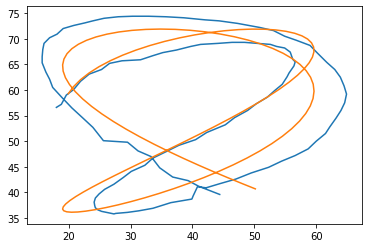

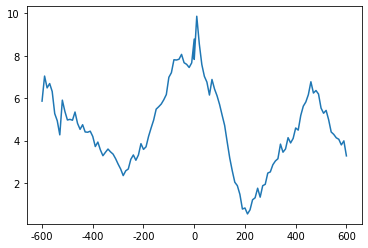

In [3]:
from scipy.optimize import curve_fit
green_P2 = np.append(np.array([40.8,42.2,44.4,47.0,49.5,52.3,54.4,56.6,58.7,60.0,61.5,62.2,63.2,64.0,64.6,
64.9,64.5,63.9,63.0,61.7,60.2,59.0,56.8,54.9,53.1,50.9,47.3,44.3,42.0,
38.6,35.7,32.9,30.3,28.0,25.7,23.9,22.6,20.8,19.1,18.1,16.9,16.0,15.8,
15.7,15.7,16.3,16.9,17.4,19.0,20.5,22.3,23.9,25.6,29.5,31.2,33.3,34.7,
36.8,39.3,41.0,44.4])[::-1],np.array([40.1,39.9,36.5,33.6,31.3,29.5,27.6,27.3,26.1,25.3,24.7,
24.3,24.2,24.1,24.3,24.9,25.8,27.3,28.8,30.1,32.3,33.6,35.8,37.8,40.5,42.3,
45.3,46.8,48.9,50.3,52.1,53.3,54.5,55.3,55.6,56.4,56.6,56.2,55.8,54.9,
53.6,52.6,50.5,48.4,46.4,44.1,41.3,39.7,37.4,35.2,33.6,31.6,28.6,26.6,25.3,
23.3,21.9,20.8,19.6,18.8,18.0]))

red_P2=np.append(np.array([40.9,41.7,42.6,43.8,44.9,46.1,47.2,48.5,50.0,51.5,
52.8,54.5,56.0,57.5,59.2,60.8,62.5,64.0,65.4,67.2,68.7,69.7,70.5,71.6,72.2,
73.0,73.5,73.7,74.1,74.3,74.4,74.4,74.3,74.0,73.5,73.1,72.6,72.0,70.9,70.2,
69.1,67.9,66.5,65.3,63.5,62.1,60.5,58.4,56.5,54.5,52.7,50.1,49.8,48.1,47.0,
44.8,43.0,42.3,41.2,39.6])[::-1],np.array([41.1,39.3,38.7,38.0,36.9,36.4,
36.1,35.9,35.8,36.1,36.3,36.6,37.0,37.4,38.1,38.9,39.7,40.6,41.6,42.9,44.1,
45.3,46.7,48.0,49.2,50.3,51.7,53.2,54.6,56.0,57.3,58.6,59.9,61.1,62.6,63.3,
64.7,65.5,66.,67.4,68.2,68.5,68.9,69.1,69.3,69.3,69.1,68.9,68.5,67.8,67.3,
66.7,65.9,65.7,65.2,64.0,63.1,61.7,60.1,59.0,57.2,56.6]))
'''poly = np.polyfit(x,green_P2,deg=2)
green_P2/=np.polyval(poly,x)
poly = np.polyfit(x,red_P2,deg=2)
red_P2/=np.polyval(poly,x)'''
x=np.append(np.linspace(-600,0,61),np.linspace(0,600,61))
plt.plot(green_P2,red_P2)
poptg,convg = curve_fit(P,x,green_P2,maxfev=1000000,p0=[270,1,0,59])
poptr,convr = curve_fit(P,x,red_P2,maxfev=100000,p0=[342,40,0,40])
datag=P(x,*poptg)
datar=P(x,*poptr)
plt.plot(datag,datar)
siga=np.sqrt((green_P2-datag)**2+(red_P2-datar)**2)
plt.subplots()
plt.plot(x,siga)

[ 2.61829502e+02  6.26268132e-01 -6.08524466e-01  5.08547863e-02]


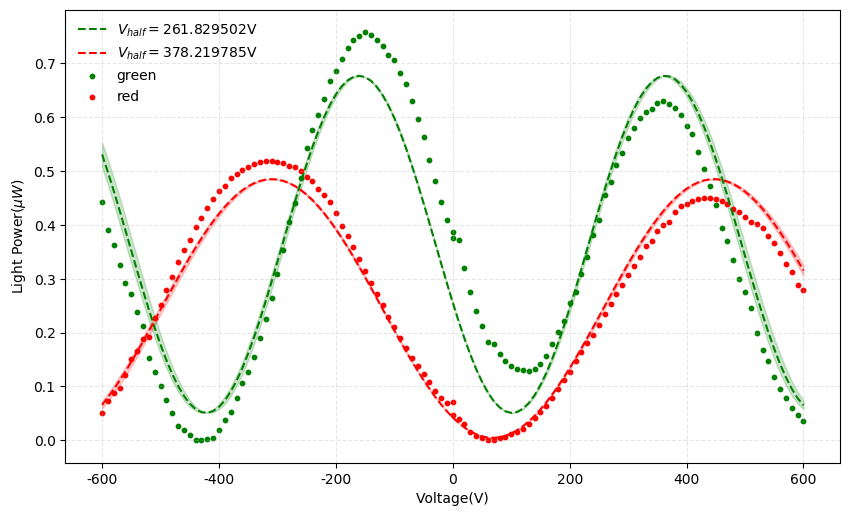

In [4]:
from scipy.optimize import curve_fit
V=np.linspace(-600,600,1000)
P1=P(V,563)
P2=P(V,505-121)
plt.subplots(figsize=(10,6),dpi=100)
#plt.plot(V,P1,label='650nm')
#plt.plot(V,P2,label='520nm')
x=np.append(np.linspace(-600,0,61),np.linspace(0,600,61))
green_P2=green_P2/green_P2.max()-green_P2.min()/green_P2.max()
red_P2=red_P2/red_P2.max()-red_P2.min()/red_P2.max()
poptg,convg = curve_fit(P,x,green_P2,maxfev=1000000,p0=[270,1,0,59])
poptr,convr = curve_fit(P,x,red_P2,maxfev=100000,p0=[342,40,0,40])

plt.scatter(x,green_P2,c='g',s=10,label='green')
poptgup=poptg.copy()+np.diag(convg)
poptgdown=poptg.copy()-np.diag(convg)
print(poptg)
plt.plot(x,P(x,*poptg),c='g',ls='--',label=r'$V_{half}=%f$V'%np.abs(poptg[0]))
plt.fill_between(x,P(x,*poptgup),P(x,*poptgdown),color='g',alpha=0.2)

plt.scatter(x,red_P2,c='r',  s=10,label='red')
plt.plot(x,P(x,*poptr),c='r',ls='--',label=r'$V_{half}=%f$V'%poptr[0])
poptrup=poptr.copy()+np.diag(convr)
poptrdown=poptr.copy()-np.diag(convr)
plt.fill_between(x,P(x,*poptrup),P(x,*poptrdown),color='r',alpha=0.2)

plt.xlabel('Voltage(V)')
plt.ylabel('Light Power($\mu W$)')
plt.grid(ls='--',alpha=0.3)
plt.legend(frameon=False)
plt.savefig('fit.png')

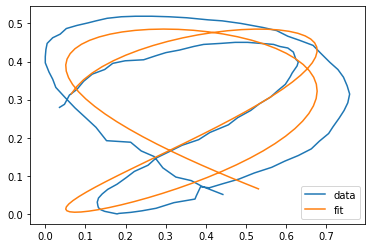

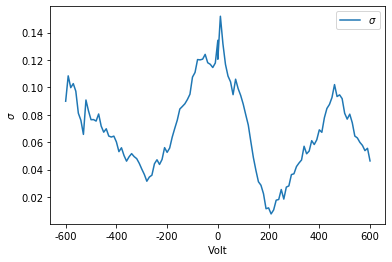

In [48]:
x=np.append(np.linspace(-600,0,61),np.linspace(0,600,61))
plt.plot(green_P2,red_P2,label='data')
poptg,convg = curve_fit(P,x,green_P2,maxfev=1000000,p0=[270,1,0,59])
poptr,convr = curve_fit(P,x,red_P2,maxfev=100000,p0=[342,40,0,40])
datag=P(x,*poptg)
datar=P(x,*poptr)
plt.plot(datag,datar,label='fit')
plt.savefig('lisaru.png')
siga=np.sqrt((green_P2-datag)**2+(red_P2-datar)**2)
plt.legend()
plt.subplots()
plt.plot(x,siga,label=r'$\sigma$')
plt.ylabel(r'$\sigma$')
plt.xlabel('Volt')
plt.legend()
plt.savefig('sigma.png')

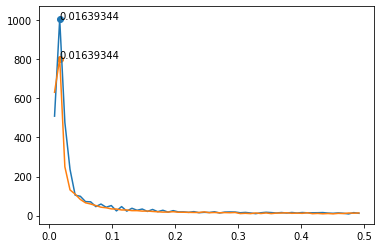

In [9]:
for color in [green_P2,red_P2]:
    fft_green=np.abs(np.fft.fft(color))
    fft_greenx=np.fft.fftfreq(len(color))
    mask=np.where(fft_greenx>0)[0]
    y=fft_green[mask]
    x=fft_greenx[mask]
    plt.plot(x,y)
    plt.scatter(x[np.where(y==y.max())[0]],y.max())
    maxx=x[np.where(y==y.max())[0]][0]
    maxy=y.max()
    plt.text(maxx,maxy,'{:.8f}'.format(maxx))

[]


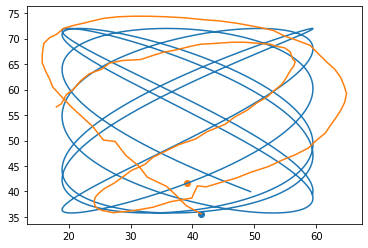

In [10]:
from matplotlib.patches import Circle
'''cir1 = Circle(xy = xy, radius=radius,color='b',alpha=0.5)
ax.add_patch(cir1)'''
def nearest(point,x,y):
    line=np.vstack((x,y)).T
    dist=np.sum((line-point)**2,axis=1)
    res = line[np.where(dist==np.min(dist))[0]]
    return res
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(green_P2[0],red_P2[0])
ax.scatter(39.12706421, 41.60821506)
print(x[np.where(P(x,*poptg)==39.12706421)])
x=np.linspace(-600,3000,10000)
ax.plot(P(x,*poptg),P(x,*poptr))
plt.plot(green_P2,red_P2)

In [65]:

def dist(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
def is_nearby(i,xy_scan,datag,datar,j):
    last=(datag[i-1],datar[i-1])
    next=(datag[i+1],datar[i+1])
    gap=int(2*j/dist(last,next)+1)
    left=0 if i-gap<0 else i-gap
    right=len(datag) if i+gap>len(datag) else i+gap
    nearlist=[(x,y) for x in datag[left:right] for y in datar[left:right]]
    return xy_scan in nearlist 

def find_radius(datag,datar,sigma):
    radiuslist=[]
    for i in range(1,length-1):
        print('{:*<10s} {:d}%\r'.format('>'*int(i/(length-1)*10),int(i/(length-1)*100)),end='')
        xy_ori=(datag[i],datar[i])
        for j in np.arange(0,sigma,0.01):
            maxsigma=0
            for k in range(length):
                xy_scan=(datag[k],datar[k])
                if dist(xy_ori,xy_scan)<j and j>0 and xy_ori!=xy_scan:
                    if not is_nearby(i,xy_scan,datag,datar,j):
                        maxsigma=j/2
                        break
            if maxsigma != 0:
                break
        radiuslist.append(maxsigma)
    return radiuslist

x=np.linspace(100,320,200)
datag=P(x,*poptg)
datar=P(x,*poptr)
length=len(datag) 
radiuslist=find_radius(datag,datar,0.2)
np.save('radiulist_exp',radiuslist)

In [61]:
def yoe(l):
    for i in range(l):
        yield i

g=yoe(50)

In [92]:

s=next(g)
print(s)
if dist((datag[10],datar[10]),(datag[s],datar[s]))<1:
    if is_nearby(10,(datag[s],datar[s]),datag,datar,1):
        print('nearby')
    else:
        print('not nearby')

30


In [66]:
from matplotlib.patches import Circle
#x=np.linspace(0,400,300)
#mask=[np.where(x<600)[0]]
#x=x[mask]
datag=P(x,*poptg)
datar=P(x,*poptr)
length=len(datag)
radiuslist=np.load('radiulist_exp.npy')


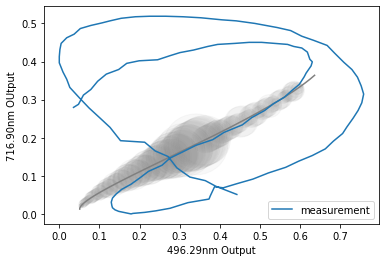

In [68]:
fig=plt.figure()
ax=plt.axes()
plt.plot(datag,datar,color='gray')
for i in range(len(radiuslist)):
    cir1 = Circle(xy = (datag[i],datar[i]), radius=radiuslist[i],color='gray',alpha=0.05)
    ax.add_patch(cir1)
plt.plot(green_P2,red_P2,label='measurement')
plt.legend()
plt.xlabel('{:.2f}'.format(getlamda(261.83))+'nm Output')
plt.ylabel('{:.2f}'.format(getlamda(378.22))+'nm OUtput')
plt.savefig('res_better.png')

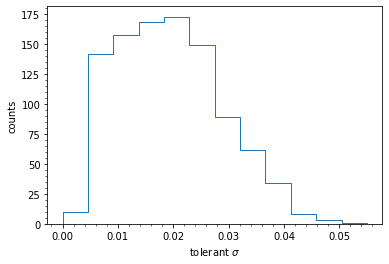

In [42]:
plt.hist(radiuslist,bins=12,histtype='step')
plt.minorticks_on()
plt.xlabel(r'tolerant $\sigma$')
plt.ylabel('counts')

plt.savefig('tol_hist_res.png')

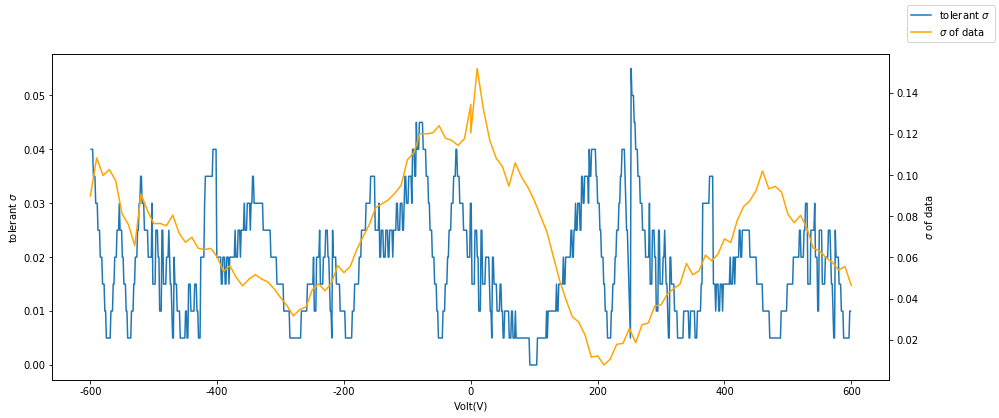

In [43]:
x=np.linspace(-600,600,1000)[1:-1]
fig,ax=plt.subplots(figsize=(15,6))
ax.plot(x,radiuslist,label=r'tolerant $\sigma$')

x=np.append(np.linspace(-600,0,61),np.linspace(0,600,61))
datag=P(x,*poptg)
datar=P(x,*poptr)
siga=np.sqrt((green_P2-datag)**2+(red_P2-datar)**2)
ax2=ax.twinx()
ax2.plot(x,siga,color='orange',label=r'$\sigma$ of data')
ax.set_xlabel('Volt(V)')
ax.set_ylabel(r'tolerant $\sigma$')
ax2.set_ylabel(r'$\sigma$ of data')
fig.legend()
plt.savefig('tol_Vmap.png')

In [ ]:
from scipy.optimize import fsolve
import numpy as np
def P_findroot(V,res1,res2,para1,para2):
    V_half1,a1,b1,c1=para1
    V_half2,a2,b2,c2=para2
    return np.array([a1*np.sin(np.pi*V[0]/(2*V_half1)+b1+V[1]*2*np.pi)**2+c1-res1,a2*np.sin(np.pi*V[0]/(2*V_half2)+b2+V[1]*2*np.pi)**2+c2-res2])
fsolve(P_findroot,x0=[0,0],args=(P(-600,*poptg), P(-600,*poptr),poptg,poptr))
print()

In [ ]:
a='0V,35.2,100V,34.9,200V,26.4,300V,13.6,400V,10.9,500V,21.0,10V,35.3,110V,34.4,210V,25.1,310V,13.0,410V,11.4,510V,22.1,20V,35.6,120V,33.8,220V,23.7,320V,12.3,420V,12.1,520V,23.2,30V,35.7,130V,33.3,230 V,22.4,330V,11.7,430V,12.9,530V,24.3,40V,35.9,140V,32.7,240V,21.2,340V,11.2,440V,13.9,540V,25.3,50V,36.1,150V,32.1,250V,20.1,350V,10.7,450V,14.9,550V,26.2,60V,36.0,160V,31.1,260V,18.6,360V,10.5,460V,16.2,560V,27.1,70V,35.9,170V,30.2,270V,17.2,370V,10.3,470V,17.2,570V,27.8,80V,35.6,180V,29.0,280V,16.0,380V,10.4,480 V,18.6,580 V,28.4,90V,35.3,190V,27.8,290V,14.7,390V,10.5,490V,19.7,590 V,28.9'
b=np.vstack((np.array(list(map(float,[i.strip('V') for i in a.split(',')[::2]]))),np.array(list(map(float,a.split(',')[1::2]))))).T
b.sort(axis=0)
x,y=b.T
plt.plot(x,y)

In [ ]:
points=np.vstack((green_P2,red_P2)).T
print(points[0])
nearest(points[0],P(x,*poptg),P(x,*poptr))

In [ ]:
import scipy
scipy.signal.convolve(P1,P2,mode='same')

In [ ]:
from scipy.signal import convolve
C_P1 = convolve(P1,P2,mode='same')
plt.plot(C_P1/C_P1.max())
plt.plot(P1)
plt.plot(P2)

[-16.328      +0.j         -30.49486714 +8.50178163j
 -46.13382459+26.06524854j ... -71.25645166-56.35085527j
 -46.13382459-26.06524854j -30.49486714 -8.50178163j]
[203.48       +0.j          11.91051284 +5.94718514j
  19.55740333+19.23032593j ...  25.72007234-22.4938821j
  19.55740333-19.23032593j  11.91051284 -5.94718514j]


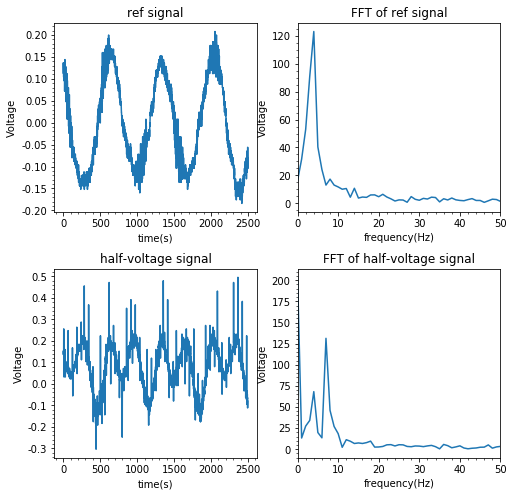

In [3]:
import pandas as pd
fig,ax=plt.subplots(2,2,figsize=(8,8))
files=['TEK0000.csv','TEK0001.csv']
voltage=['ref signal','half-voltage signal']
for i in range(2):
    red_half_x = pd.read_csv(files[i])
    x =np.array(red_half_x[red_half_x.columns[3]])
    y=np.array(red_half_x[red_half_x.columns[4]])
    fft_y=np.fft.fft(y)
    print(fft_y)
    ax[i,1].plot(np.abs(fft_y))
    ax[i,1].set_title('FFT of '+voltage[i])
    ax[i,1].set_xlim(0,50)
    ax[i,0].set_ylabel('Voltage')
    ax[i,0].set_xlabel('time(s)')
    ax[i,0].plot(y)
    ax[i,0].set_title(voltage[i])
    ax[i,0].minorticks_on()
    ax[i,1].minorticks_on()
    ax[i,1].set_ylabel('Voltage')
    ax[i,1].set_xlabel('frequency(Hz)')
fig.subplots_adjust(hspace=0.3)

In [ ]:
import pandas as pd
fig,ax=plt.subplots(2,2,figsize=(8,8))
files=['TEK0009.csv','TEK0010.csv']
voltage=['ref signal','half-voltage signal']
for i in range(2):
    red_half_x = pd.read_csv(files[i])
    x =np.array(red_half_x[red_half_x.columns[3]])
    y=np.array(red_half_x[red_half_x.columns[4]])
    fft_y=np.fft.fft(y)
    print(fft_y)
    ax[i,1].plot(np.abs(fft_y))
    ax[i,1].set_title('FFT of '+voltage[i])
    #ax[i,1].set_xlim(0,200)
    ax[i,0].plot(y)
    ax[i,0].set_title(voltage[i])

In [216]:
half_length_voltage(520)

274.3398946057751